# Indice:


### **1. Análisis exploratório de los datos de Delitos_Chicago.csv**

     1.0 Importamos librerias y cargamos el dataframe.
     1.1 Entendiendo a los datos
     1.2 Valores nulos
     1.3 Transformación de variable categórica
     1.4 Columnas irrelevantes
     1.5 Tipos de variables
     1.6 Estandarización de variable numérica
     

### **2. Modelo de aprendizaje no supervizado**


### **3. Anexo - Respuestas**
    
    Ejercicio 4  

# **1. Análisis exploratório de los datos**

## 1.0 Se importan las librerias y se carga el dataframe.

In [8]:
#Se importan la librerías que se va a necesitar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# No muestre los warnings
warnings.filterwarnings("ignore")

# Para que pandas saque todas las columnas
pd.options.display.max_columns = None

Se carga el dataset que se va a usar.

In [12]:
# Ruta del archivo csv
ruta2 = "Delitos_Chicago.csv"

# Leer los archivos csv
datos2 = pd.read_csv(ruta2, sep = ',')

# Creación del dataframe
df3 = pd.DataFrame(datos2)

## 1.1 Entendiendo a los datos

Se muestra el dataframe

In [13]:
df3.head(4)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12.0,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29.0,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35.0,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
3,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28.0,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


**Conformación del dataframe, tipo de datos etc.**

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264758 entries, 0 to 264757
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    264758 non-null  int64  
 1   Case Number           264758 non-null  object 
 2   Date                  264758 non-null  object 
 3   Block                 264758 non-null  object 
 4   IUCR                  264758 non-null  object 
 5   Primary Type          264758 non-null  object 
 6   Description           264758 non-null  object 
 7   Location Description  264169 non-null  object 
 8   Arrest                264758 non-null  bool   
 9   Domestic              264758 non-null  bool   
 10  Beat                  264758 non-null  int64  
 11  District              264758 non-null  int64  
 12  Ward                  264756 non-null  float64
 13  Community Area        264758 non-null  int64  
 14  FBI Code              264758 non-null  object 
 15  

In [15]:
#Se realiza un describe 
df3.describe(include="all")

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,2.647580e+05,264758,264758,264758,264758,264758,264758,264169,264758,264758,264758.000000,264758.000000,264756.000000,264758.000000,264758,2.579310e+05,2.579310e+05,264758.0,264758,257931.000000,257931.000000,257931
unique,NaN,264731,112346,27519,331,33,339,136,2,2,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,2074,NaN,NaN,131466
top,NaN,HY346207,01/01/2015 12:01:00 AM,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,False,False,NaN,NaN,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.883500187, -87.627876698)"
freq,NaN,4,197,768,24676,57350,27415,60755,194723,222776,NaN,NaN,NaN,NaN,57350,NaN,NaN,NaN,242053,NaN,NaN,490
mean,1.013827e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1144.019950,11.211299,22.814391,37.577830,NaN,1.164456e+06,1.885560e+06,2015.0,NaN,41.841576,-87.672039,NaN
std,4.746205e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.777178,6.901425,13.782807,21.421019,NaN,1.646855e+04,3.120900e+04,0.0,NaN,0.085837,0.059943,NaN
min,2.171400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,1.000000,1.000000,1.000000,NaN,1.094231e+06,1.813897e+06,2015.0,NaN,41.644590,-87.928909,NaN
25%,1.003380e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,612.000000,6.000000,10.000000,23.000000,NaN,1.152408e+06,1.858596e+06,2015.0,NaN,41.767337,-87.715914,NaN
50%,1.014868e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023.000000,10.000000,23.000000,32.000000,NaN,1.166063e+06,1.891472e+06,2015.0,NaN,41.857863,-87.666017,NaN
75%,1.026310e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1654.000000,16.000000,34.000000,57.000000,NaN,1.176389e+06,1.908452e+06,2015.0,NaN,41.904503,-87.627995,NaN


## 1.2 Valores nulos

Se comprueba cuantos nulos tenemos

In [16]:
df3.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     589
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       2
Community Area             0
FBI Code                   0
X Coordinate            6827
Y Coordinate            6827
Year                       0
Updated On                 0
Latitude                6827
Longitude               6827
Location                6827
dtype: int64

## 1.3 Transformación de variable categórica

Se rellena los nulos de la variable Location Description

In [18]:
#Se rellena las filas nulas de la columna Location Description con la media
df3['Location Description'] = df3['Location Description'].fillna(df3['Location Description'].mode()[0])

In [19]:
#Se comprueba que no hay nulos en Location Description
df3.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       2
Community Area             0
FBI Code                   0
X Coordinate            6827
Y Coordinate            6827
Year                       0
Updated On                 0
Latitude                6827
Longitude               6827
Location                6827
dtype: int64

## 1.4 Columnas irrelevantes

Se crea un nuevo dataframe con la funcion copy para poder aqui borrar las columnas que no se va a necesitar.

In [20]:
df4=df3.copy()

Analizando el dataframe se decidió usar solo tres caracteristicas para el modelo, ya que se ha considerado que estas pueden aportar nuevos datos.

Las tres variables son "Block" que describe parcialmente la direccion real de donde se llevo acabo el delito. Con esta variable se obtiene una idea de en que area de la ciudad ocurrio. "IUCR" esta variable agrupa tanto la Primary Type y la Descripcion del delito. Y finalmente se usará tambien la columna "Location Description", que cuenta el lugar donde ocurrio el delito (en un apartameto, en el autobus, en una gasolinera, etc)

Las tres variables elegidas son de tipo object, que más delante se modificará a númericas para que puedan ser usadas en el modelo.


In [21]:
#Se elimina las columnas que no son necesarias con la función 
df4.drop(columns=["ID","Case Number","Date","Primary Type","Description",
                  "Beat","District","Ward",
                  "Community Area", "FBI Code","X Coordinate",
                  "Y Coordinate","Year","Updated On","Latitude",
                  "Longitude","Location"], inplace=True, axis=1)

df4.head()

,Block,IUCR,Location Description,Arrest,Domestic
0,043XX S WOOD ST,0486,RESIDENCE,False,True
1,008XX N CENTRAL AVE,0870,CTA BUS,False,False
2,035XX W BARRY AVE,2023,SIDEWALK,True,False
3,0000X N LARAMIE AVE,0560,APARTMENT,False,True
4,082XX S LOOMIS BLVD,0610,RESIDENCE,False,False


In [22]:
# Nuevo dataframe
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264758 entries, 0 to 264757
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Block                 264758 non-null  object
 1   IUCR                  264758 non-null  object
 2   Location Description  264758 non-null  object
 3   Arrest                264758 non-null  bool  
 4   Domestic              264758 non-null  bool  
dtypes: bool(2), object(3)
memory usage: 6.6+ MB


## 1.5 Tipos de variables

Como las columnas son de tipo object, se convierten en númericas con la función  label encoder

In [23]:
columns_object = df4.loc[:, df4.dtypes == object].columns
columns_object

Index(['Block', 'IUCR', 'Location Description'], dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
df4[columns_object] = df4[columns_object].apply(LabelEncoder().fit_transform)
df4[columns_object] = df4[columns_object].astype("int64")
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264758 entries, 0 to 264757
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Block                 264758 non-null  int64
 1   IUCR                  264758 non-null  int64
 2   Location Description  264758 non-null  int64
 3   Arrest                264758 non-null  int64
 4   Domestic              264758 non-null  int64
dtypes: int64(5)
memory usage: 10.1 MB


**Se convierten las variables booleanas en 0 y 1**

In [30]:
df4['Arrest'].replace([False, True], [0, 1], inplace=True)
df4['Domestic'].replace([False, True], [0, 1], inplace=True)

Antes de usar el dataframe en el modelo, se muestra y se observa que los datos deben ser normalizados para que puedan ser analizados correctamente.

In [31]:
df4.head(2)

,Block,IUCR,Location Description,Arrest,Domestic
0,15639,48,101,0,1
1,3389,85,46,0,0


## 1.6 Estandarización de variable numérica

Se normaliza con el metodo Normalize que reescala el vector de fila a su vector unitario. 

In [32]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(df4)
df4 = scaler.transform(df4)
print(df4)

[[9.99974435e-01 3.06917149e-03 6.45804833e-03 0.00000000e+00
  6.39410726e-05]
 [9.99593598e-01 2.50709519e-02 1.35678092e-02 0.00000000e+00
  0.00000000e+00]
 [9.99812157e-01 1.72600410e-02 8.81681747e-03 7.47187921e-05
  0.00000000e+00]
 ...
 [9.99990424e-01 1.15132581e-03 4.22152795e-03 6.39625447e-05
  0.00000000e+00]
 [9.99960533e-01 7.97706966e-03 3.91108755e-03 3.87236391e-05
  3.87236391e-05]
 [9.99977873e-01 5.05385425e-03 4.32575660e-03 0.00000000e+00
  0.00000000e+00]]


## 2. MODELO DE APRENDIZAJE NO SUPERVISADO

Para determinar cuántos números de clúster se necesitan en su modelo de aprendizaje no supervisado, se utilizará el Método de la dispersión.

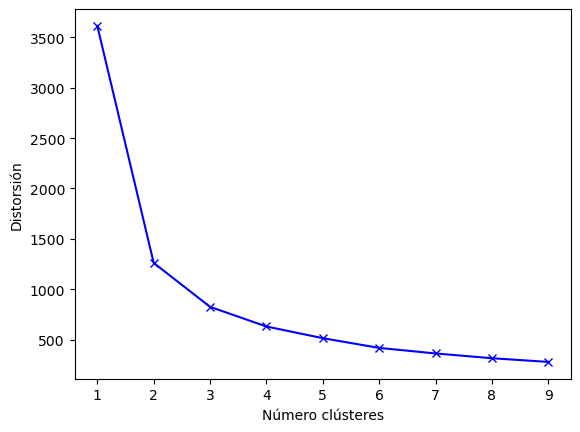

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X=df4
distorsion = []
for i in range(1, 10):
    kmeans = KMeans (n_clusters = i, n_init=10).fit(X)
    distorsion.append(kmeans.inertia_)
#Pintamos la gráfica
plt.xlabel("Número clústeres")
plt.ylabel("Distorsión")
plt.plot(range(1,10), distorsion, "bx-")
plt.show()

El resultado que se muestra indica que un número adecuado de clústeres podría ser 3, ya que es la cantidad en la que la distorsión disminuye rápidamente.

Se lanza el modelo K-Means con 3 clusters

Centroides:
 [[9.53693413e-01 2.09319340e-01 1.52320678e-01 5.71360481e-04
  1.78377010e-04]
 [9.99490068e-01 1.43575708e-02 1.21830720e-02 3.66154036e-05
  2.03763144e-05]
 [6.03037293e-01 5.45139753e-01 4.69967133e-01 1.41103623e-03
  4.42250609e-04]]
[1 1 1 ... 1 1 1]


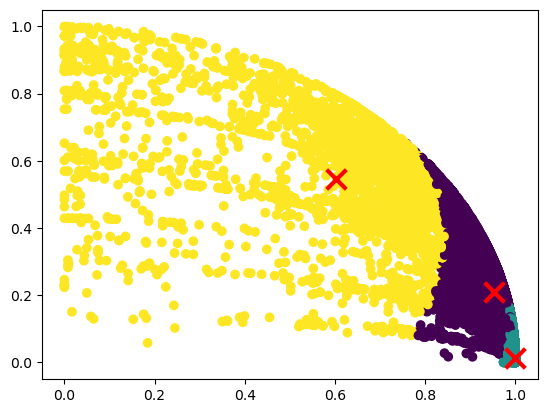

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Creación del conjunto de datos
X = df4

#Iniciando el algoritmo k-means con k = 3 clústeres
kmeans = KMeans (n_clusters= 3, random_state= 42)

#Entrenando el modelo con los datos
kmeans.fit(X)

#Predeciendo la asignación del clúster para cada punto de datos
labels = kmeans.predict(X)

# Prediction on the entire data
all_predictions = kmeans.predict(X)

#Obteniendo los centroides de los clústeres
centroides = kmeans.cluster_centers_

print("Centroides:\n", centroides)
print(all_predictions)

#Visualizando los datos y los centroides de los clústeres en un gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroides[:, 0], centroides[:, 1], marker="x",
            s=200, linewidths=3, color="r")
plt.show()

Se utilizó DBSCAN para confirmar que los clústeres y grupos formados son los correctos. Al ejecutar DBSCAN, se formaron 3 grupos.

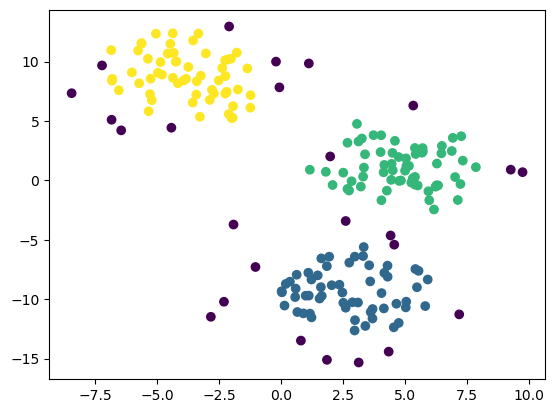

In [35]:
#Importando las librerías necesarias
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

#Creando un conjunto de datos de prueba
X, y_clusters = make_blobs (200, cluster_std=2)

#Creando una instancia de DBSCAN
dbscan = DBSCAN (eps= 1.2, min_samples=3)

#Ajustando y entrenando el modelo en los datos
y_pred = dbscan.fit_predict(X)

#Rresultados
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.show()

## Ejercicio 4


Plantead una segmentación analítica de delitos atendiendo a sus características. Dad respuesta a las siguientes preguntas:

* **¿Cuántos segmentos tiene la solución planteada?**

Si bien el método del codo nos indica que la distorsión disminuye lentamente a partir del tercer clúster, el método DBSCAN confirma que se forman 3 clústeres.

* **¿Qué características tienen los delitos de cada segmento?**

La gráfica resultante del K-Means contiene 3 grupos que podrían interpretarse de la siguiente manera: hay 3 grupos en los que se puede observar la cantidad de delitos y su variedad (tipo), lo que puede reflejar 3 puntos calientes dentro de la ciudad en los que se debe enfocar el aumento de la vigilancia. El grupo 1 es más disperso, y se nota una disminución de la distorsión a medida que se crean los grupos.

En términos generales, el modelo sugiere la existencia de cuatro segmentaciones al relacionar el código IUCR con la ubicación del delito. Sería prudente prestar atención a estas variables y realizar un estudio para identificar posibles relaciones que aclaren esta clusterización.